<a href="https://colab.research.google.com/github/GodfatherM/Assignments-/blob/main/FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Training a Feedforward Neural Network Model with MNIST Dataset
"Name:Alejandro de Jesus Guerrero Maynes"
"ID Number:2109308"
"Class Time:N4-N6"


'Class Time:N4-N6'

In [ ]:
# Importing essential libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score


In [ ]:
# Loading the MNIST dataset
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Print shape to verify dataset dimensions
print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')


Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [ ]:
# Normalizing data
train_data = train_data / 255.0
test_data = test_data / 255.0

# One-hot encoding labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


In [ ]:
# Building the feedforward neural network
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten input image data
model.add(Dense(128, activation='relu'))  # Hidden layer
model.add(Dense(64, activation='relu'))   # Hidden layer
model.add(Dense(10, activation='softmax'))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Training the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8593 - loss: 0.4800 - val_accuracy: 0.9615 - val_loss: 0.1388
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9638 - loss: 0.1184 - val_accuracy: 0.9700 - val_loss: 0.0999
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9760 - loss: 0.0766 - val_accuracy: 0.9702 - val_loss: 0.0935
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9834 - loss: 0.0559 - val_accuracy: 0.9707 - val_loss: 0.0997
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9865 - loss: 0.0430 - val_accuracy: 0.9745 - val_loss: 0.0898
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9884 - loss: 0.0346 - val_accuracy: 0.9722 - val_loss: 0.1028
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9914 - loss: 0.0266 - val_accuracy: 0.9757 - val_loss: 0.0913
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9928 - loss: 0.021

In [ ]:
# Evaluating the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test Accuracy: {test_accuracy:.4f}')


313/313 - 1s - 2ms/step - accuracy: 0.9790 - loss: 0.0896
Test Accuracy: 0.9790


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


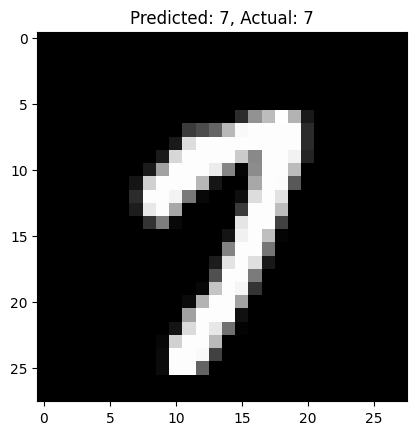

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


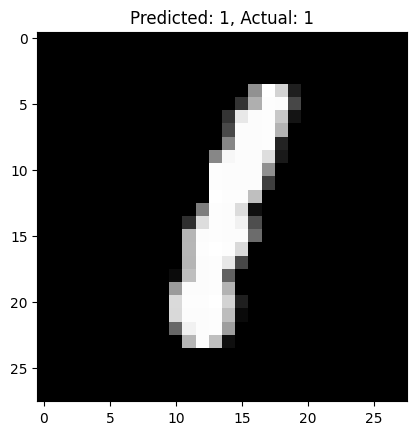

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


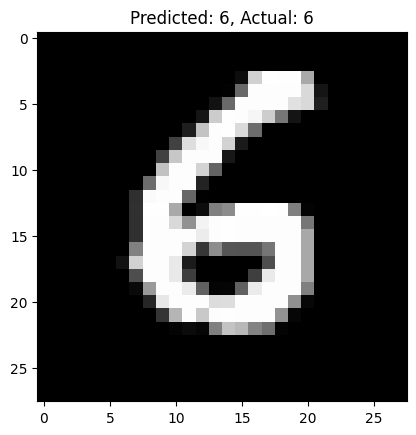

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


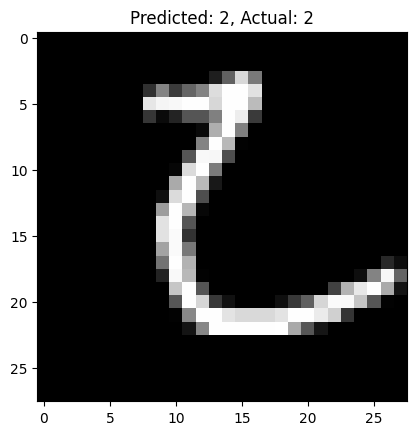

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


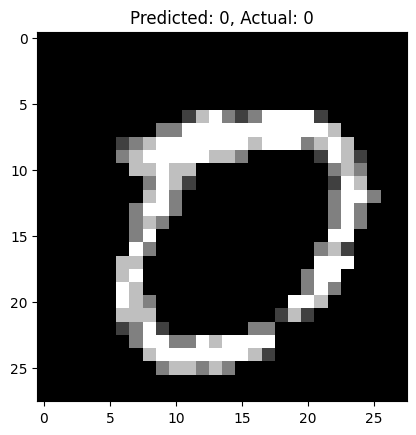

In [ ]:
# Making predictions on 5 random samples from the test set
for i in range(5):
    idx = np.random.randint(0, test_data.shape[0])
    image = test_data[idx]
    actual_label = np.argmax(test_labels[idx])
    prediction = np.argmax(model.predict(image.reshape(1, 28, 28)), axis=1)[0]

    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted: {prediction}, Actual: {actual_label}')
    plt.show()
